In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train.min(), X_train.max()

(0, 255)

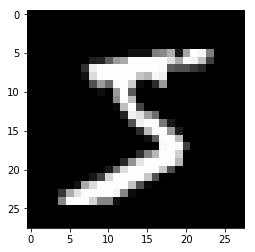

In [6]:
img = X_train[0]
plt.imshow(img, cmap=plt.get_cmap('gray'));

In [7]:
y_train[0]

5

In [8]:
X_train = X_train.reshape(60_000, 28 * 28)
X_test = X_test.reshape(10_000, 28 * 28)
scalar = MinMaxScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
X_train.shape, X_test.shape, X_train.min(), X_train.max()

((60000, 784), (10000, 784), 0.0, 1.0)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(784,), name='L1'))
model.add(Dense(units=10, activation='softmax', name='Out'))

opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 32)                25120     
_________________________________________________________________
Out (Dense)                  (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=25, verbose=2, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 - 2s - loss: 0.3833 - categorical_accuracy: 0.8947 - val_loss: 0.2360 - val_categorical_accuracy: 0.9344
Epoch 2/10
42000/42000 - 2s - loss: 0.2072 - categorical_accuracy: 0.9399 - val_loss: 0.1899 - val_categorical_accuracy: 0.9452
Epoch 3/10
42000/42000 - 2s - loss: 0.1613 - categorical_accuracy: 0.9539 - val_loss: 0.1641 - val_categorical_accuracy: 0.9523
Epoch 4/10
42000/42000 - 2s - loss: 0.1330 - categorical_accuracy: 0.9608 - val_loss: 0.1540 - val_categorical_accuracy: 0.9549
Epoch 5/10
42000/42000 - 2s - loss: 0.1135 - categorical_accuracy: 0.9660 - val_loss: 0.1486 - val_categorical_accuracy: 0.9566
Epoch 6/10
42000/42000 - 2s - loss: 0.0998 - categorical_accuracy: 0.9709 - val_loss: 0.1494 - val_categorical_accuracy: 0.9571
Epoch 7/10
42000/42000 - 2s - loss: 0.0883 - categorical_accuracy: 0.9735 - val_loss: 0.1452 - val_categorical_accuracy: 0.9581
Epoch 8/10
42000/42000 - 2s - loss: 0.0798 - categoric

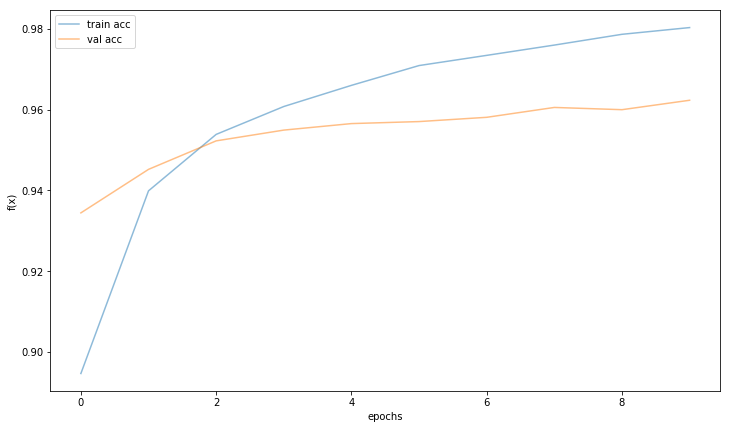

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(history.epoch, history.history['categorical_accuracy'], alpha=0.5, label='train acc')
plt.plot(history.epoch, history.history['val_categorical_accuracy'], alpha=0.5, label='val acc')
plt.xlabel('epochs')
plt.ylabel('f(x)')

plt.legend()
plt.show()